In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [11]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
train['Embarked'].fillna('S',inplace=True)

In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [15]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [16]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [18]:
train_age=np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean()+train['Age'].std(),177)

In [19]:
test_age=np.random.randint(test['Age'].mean()-test['Age'].std(),test['Age'].mean()+test['Age'].std(),86)

In [23]:
train['Age'][train['Age'].isnull()]=train_age

C:\Users\aditya raj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
test['Age'][test['Age'].isnull()]=test_age

C:\Users\aditya raj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [27]:
#EDA

In [30]:
train[train['Pclass']==3]['Survived'].value_counts()

0    372
1    119
Name: Survived, dtype: int64

In [31]:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [32]:
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [33]:
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [34]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

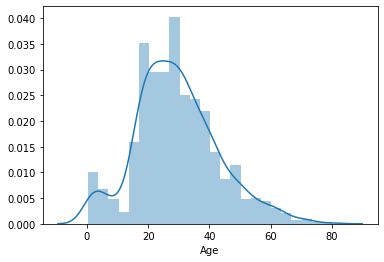

In [36]:
sns.distplot(train['Age'])

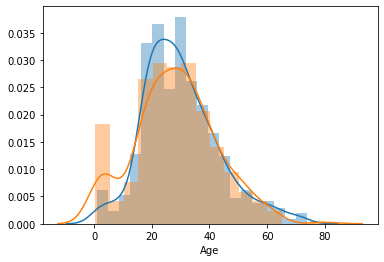

In [38]:
sns.distplot(train['Age'][train['Survived']==0])
sns.distplot(train['Age'][train['Survived']==1])

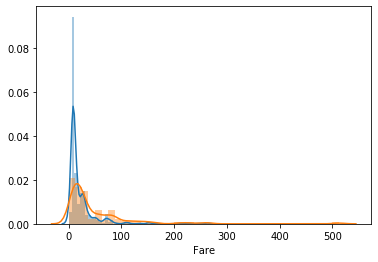

In [42]:
sns.distplot(train['Fare'][train['Survived']==0])
sns.distplot(train['Fare'][train['Survived']==1])

In [43]:
train.drop(columns='Ticket',inplace=True)
test.drop(columns='Ticket',inplace=True)

In [44]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [45]:
train['family']=train['SibSp']+train['Parch']+1

In [48]:
test['family']=test['SibSp']+test['Parch']+1

In [46]:
train['family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family, dtype: int64

In [47]:
train.groupby(['family'])['Survived'].mean()

family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [49]:
def cal(number):
    if number==1:
        return "Alone"
    elif number>1 and number<5:
        return "Medium"
    else:
        return "Large"
        

In [50]:
train['family_size']=train['family'].apply(cal)

In [54]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,Alone


In [52]:
test['family_size']=test['family'].apply(cal)

In [53]:
train.drop(columns=['SibSp','Parch','family'],inplace=True)
test.drop(columns=['SibSp','Parch','family'],inplace=True)

In [55]:
print(train.shape)

(891, 9)


In [56]:
print(test.shape)

(418, 8)


In [57]:
passengerId=test['PassengerId'].values

In [58]:
train.drop(columns=['Name','PassengerId'],inplace=True)
test.drop(columns=['Name','PassengerId'],inplace=True)

In [59]:
train.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
family_size    0
dtype: int64

In [62]:
train=pd.get_dummies(train,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [65]:
train.shape

(891, 10)

In [64]:
test=pd.get_dummies(test,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [66]:
test.shape

(418, 9)

In [68]:
X=train.iloc[:,1:].values
y=train.iloc[:,0].values

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [70]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()

In [71]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [72]:
y_pred=classifier.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7653631284916201

In [74]:
Xf=test.iloc[:,:].values

In [75]:
y_final=classifier.predict(Xf)

In [76]:
y_final.shape

(418,)

In [77]:
passengerId.shape

(418,)

In [78]:
final=pd.DataFrame()

In [79]:
final

""


In [80]:
final['passengerId']=passengerId
final['survived']=y_final

In [81]:
final.head()

,passengerId,survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [84]:
final.to_csv('submission.csv',index=False)